# Importar las librerías necesarias

In [35]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ¿Dónde está el cobalto?

Las baterías eléctricas están generando una demanda particular de cobalto, ya que las baterías de iones de litio utilizan una reacción química entre el litio y el óxido de cobalto. Existen importantes problemas con el suministro actual de cobalto, particularmente con minas de pequeña escala que no están reguladas en cuanto a seguridad, trabajo infantil e impacto ambiental. Mira este vídeo para aprender más:
https://www.youtube.com/watch?v=ll7aUgeK3-o

**Tu objetivo en esta tarea es identificar qué tipos de rocas ígneas tienen más cobalto (Co) al completar las siguientes actividades**

1) La ley más baja de mineral que es minada para cobalto es de 0.01%. ¿Cuántos puntos en los datos tienen concentraciones de cobalto que podrían ser lo suficientemente altas (recuerde que los datos están en ppm)?


2) Compare las distribuciones de cobalto en las categorías de COMPOSITION de 'FELSIC', 'INTERMEDIATE', 'MAFIC', 'ULTRAMAFIC' utilizando tanto estimaciones de densidad de probabilidad como diagramas de caja. Para el diagrama de caja, recomiendo usar `sns.boxenplot` y configurar el ``ylim``. Si tuvieras que elegir una de estas composiciones para la exploración minera, ¿a cuál elegirías y por qué?

3) Digamos que necesitas tomar una decisión si explorar en rocas máficas intrusivas (plutónicas) o rocas volcánicas máficas. Las rocas plutónicas (que poseen granos más grueso debido a que cristalizaron bajo tierra) tienen la etiqueta 'PLUTONIC' en la columna 'TYPE', mientras que las rocas volcánicas tienen la etiqueta 'VOLCANIC'. Utilice un test de hipótesis y determine si tanto la media como la mediana son estadísticamente distintas de las que resultarían de las permutaciones aleatorias. Describe los resultados de tu prueba en un párrafo que demuestre que entiendes qué es la prueba y qué significan los resultados (incluidos los valores p calculados). Será útil leer este capítulo sobre el pensamiento inferencial:
https://www.inferentialthinking.com/chapters/12/Comparing_Two_Samples.html

In [36]:
#importar datos
igneous_data = pd.read_csv('./data/ign.csv',sep='\t')
#descartar datos que no tengan Co (ppm) 
igneous_data_Co = igneous_data.dropna(subset=['CO'])

C:\Users\const\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Primera parte

In [37]:
cant_CO = np.count_nonzero(igneous_data_Co['CO']>=100)
cant_CO

981

In [38]:
nuevo=igneous_data_Co[igneous_data_Co["CO"]>=100]
nuevo

,ID,SAMPLE ID,SOURCE,REFERENCE,LOCALITY,METHODS,MATERIAL,TYPE,COMPOSITION,ROCK NAME,ID.1,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,MAX AGE,AGE,SIO2,TIO2,AL2O3,FE2O3,FE2O3T,FEO,FEOT,MGO,CAO,NA2O,K2O,P2O5,MNO,H2O_TOTAL,LA,CE,PR,ND,SM,EU,GD,TB,DY,HO,ER,TM,YB,LU,LI,BE,B,C,CO2,F,CL,SC,TI,V,CR,CO,NI,CU,ZN,GA,ZR,OS,RB,BI,HG,BA,Y,PB,TE,NB,SR87_SR86,TL,PT,SN,CD,AS,PD,SR,SE,S,AU,TA,MO,U,CS,SB,AG,W,TH,RE,HF,IR
114,KV68588,D577066,USGS,"USGS, 2004",NaN,WDXRF; ICPAES; FIS; AAS,IGNEOUS,PLUTONIC,MAFIC,GABBRO,68588,73.250,-41.7500,0.01,248.0,543.00,395.50,49.800,0.640,5.190,NaN,16.40000,NaN,NaN,19.400,6.600,0.570,0.320,0.120,0.230,NaN,7.00,13.00,NaN,9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.00,NaN,NaN,NaN,NaN,NaN,NaN,35.000,0.26,240.00,2100.00,170.0,2100.0,1200.00,93.00,NaN,NaN,NaN,NaN,NaN,NaN,120.0,11.000,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,NaN,6.2,89.0,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,KV68333,D101739,USGS,"USGS, 2004",NaN,UNKNOWN,IGNEOUS,NaN,NaN,NaN,68333,19.250,-155.1200,0.01,0.0,0.01,0.01,49.570,4.840,13.050,1.9,16.00297,12.69,NaN,4.600,8.700,2.910,0.880,0.430,0.210,NaN,50.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000,NaN,NaN,1.500,NaN,NaN,NaN,0.06,0.02,30.000,7.00,700.00,500.00,100.0,2000.0,300.00,NaN,50.00,200.0,NaN,NaN,NaN,NaN,300.0,70.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,KV68282,D549363,USGS,"USGS, 2004",NaN,WDXRF; INAA; ICPAES; FIS; EDXRF; AAS,IGNEOUS,NaN,MAFIC,NaN,68282,45.430,-110.0900,0.01,3000.0,3500.00,3250.00,49.500,0.140,7.130,NaN,12.70000,NaN,NaN,20.000,5.520,0.340,0.050,NaN,0.200,NaN,0.46,0.93,NaN,NaN,0.200,0.110,NaN,NaN,NaN,NaN,NaN,NaN,0.380,0.090,11.00,NaN,NaN,NaN,NaN,NaN,NaN,32.100,0.08,130.00,1500.00,134.0,4000.0,2400.00,73.00,NaN,10.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,3.8,NaN,NaN,NaN,10000.0,NaN,NaN,0.8,35000.0,30.0,10.0,NaN,1350.00,NaN,NaN,NaN,0.28,0.71,NaN,NaN,NaN,NaN,NaN,41.0
745,KV67957,D392340,USGS,"USGS, 2004",NaN,WDXRF; ICPMS; FIS; ES; EDXRF,IGNEOUS,PLUTONIC,MAFIC,GABBRO,67957,7.510,-64.2800,0.01,850.0,1100.00,975.00,49.200,0.680,13.700,NaN,11.40000,NaN,NaN,11.700,11.900,0.930,0.070,0.070,0.190,NaN,2.50,6.50,1.000,5.00,1.700,0.580,2.300,0.400,2.600,0.570,1.700,0.230,1.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000,0.30,150.00,1500.00,100.0,150.0,50.00,72.00,30.00,30.0,NaN,NaN,NaN,NaN,30.0,20.000,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,10.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
798,KV67904,D577068,USGS,"USGS, 2004",NaN,WDXRF; ICPAES; FIS; AAS,IGNEOUS,PLUTONIC,MAFIC,GABBRO,67904,73.250,-41.7500,0.01,248.0,543.00,395.50,49.100,0.900,15.100,NaN,15.90000,NaN,NaN,7.690,5.080,2.270,0.940,0.110,0.240,NaN,18.00,29.00,NaN,9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.00,NaN,NaN,NaN,NaN,NaN,NaN,24.000,0.59,220.00,180.00,170.0,4100.0,2800.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,410.0,6.000,12.00,NaN,16.000,NaN,NaN,6.4,NaN,NaN,NaN,2.9,550.0,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64317,KV4379,YB-44,GEOROC,"BHASKAR RAO Y. J., 1992",NaN,XRF; TIMS_ID; TIMS; IGN; ICPMS; AAS,IGNEOUS,VOLCANIC,MAFIC,BASALT,4379,13.530,75.8000,0.01,2950.0,3150.00,3050.00,52.900,1.250,14.190,NaN,12.02476,NaN,10.82,3.890,8.350,3.000,0.990,0.160,0.170,NaN,21.50,37.40,NaN,18.20,3.200,1.000,2.600,0.400,2.200,NaN,1.200,0.200,0.500,0.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.000,NaN,434.00,76.00,122.0,123.0,NaN,NaN,51.00,27.0,NaN,17.00,NaN,NaN,250.0,28.000,NaN,NaN,5.000,0.70766,NaN,NaN,NaN,NaN,NaN,NaN,351.0,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300,NaN
64530,KV4166,96TB0057,GEOROC,"BARRIE C. T., 1999",NaN,NN,IGNEOUS,VOLCANIC,MAFIC,BASALT,4166,48.200,-80.

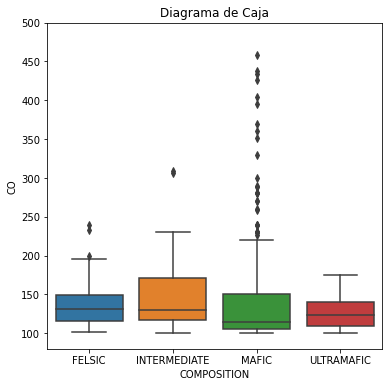

In [54]:
plt.figure(figsize=(6,6))
sns.boxplot(x="COMPOSITION", y="CO", data=nuevo, order=['FELSIC','INTERMEDIATE','MAFIC','ULTRAMAFIC'])
plt.ylim(80,500)
plt.title('Diagrama de Caja')
plt.show()

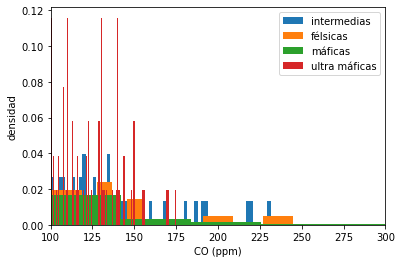

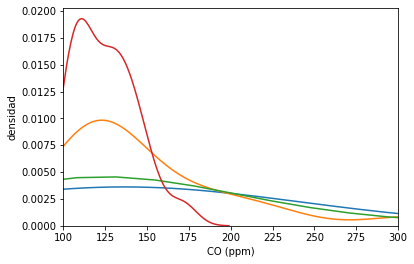

In [40]:
plt.hist(nuevo[nuevo['COMPOSITION']=='INTERMEDIATE']['CO'],bins=100,density=True,label='intermedias')
plt.hist(nuevo[nuevo['COMPOSITION']=='FELSIC']['CO'],bins=100,density=True,label='félsicas')
plt.hist(nuevo[nuevo['COMPOSITION']=='MAFIC']['CO'],bins=100,density=True,label='máficas')
plt.hist(nuevo[nuevo['COMPOSITION']=='ULTRAMAFIC']['CO'],bins=100,density=True,label='ultra máficas')

plt.xlim(100,300)
plt.xlabel('CO (ppm)')
plt.ylabel('densidad')
plt.legend()
plt.show()


sns.kdeplot(nuevo[nuevo['COMPOSITION']=='FELSIC']['CO'],label='intermedias')
sns.kdeplot(nuevo[nuevo['COMPOSITION']=='INTERMEDIATE']['CO'],label='félsicas')
sns.kdeplot(nuevo[nuevo['COMPOSITION']=='MAFIC']['CO'],label='máficas')
sns.kdeplot(nuevo[nuevo['COMPOSITION']=='ULTRAMAFIC']['CO'],label='ultra máficas')

plt.xlim(100,300)
plt.xlabel('CO (ppm)')
plt.ylabel('densidad')
plt.show()

A modo de respuesta, utilizaría las rocas de tipo máficas para la exploración minera, puesto que tienen un comportamiento más regular, a diferencia de el resto. Además son las que tienen, en promedio, mayor contenido de Co.

Digamos que necesitas tomar una decisión si explorar en rocas máficas intrusivas (plutónicas) o rocas volcánicas máficas. Las rocas plutónicas (que poseen granos más grueso debido a que cristalizaron bajo tierra) tienen la etiqueta 'PLUTONIC' en la columna 'TYPE', mientras que las rocas volcánicas tienen la etiqueta 'VOLCANIC'. Utilice un test de hipótesis y determine si tanto la media como la mediana son estadísticamente distintas de las que resultarían de las permutaciones aleatorias. Describe los resultados de tu prueba en un párrafo que demuestre que entiendes qué es la prueba y qué significan los resultados (incluidos los valores p calculados). Será útil leer este capítulo sobre el pensamiento inferencial:

**Hipótesis Nula:** La concentración de Co es la misma para rocas plutónicas y volcánicas.

**Hipótesis Alternativa:** La concentración de Co es mayor en las rocas volcánicas.

In [41]:
plutonic_CO_mean = np.mean(nuevo[(nuevo['TYPE']=='PLUTONIC') & (nuevo['COMPOSITION']=='MAFIC')]['CO'])
volcanic_CO_mean = np.mean(nuevo[(nuevo['TYPE']=='VOLCANIC') & (nuevo['COMPOSITION']== 'MAFIC')]['CO'])
print('La media de Co en las rocas plutónicas es', plutonic_CO_mean)
print('La media de Co en las rocas volcánicas es', volcanic_CO_mean)

La media de Co en las rocas plutónicas es 144.29615384615386
La media de Co en las rocas volcánicas es 175.2383838383838


In [42]:
def difference_of_means(dataframe,value,category_column,category_values):
    '''
    Function to calculate the difference of mean from a dataframe.
    
    Parameters
    ----------
    dataframe : the pandas dataframe containing the data
    value : the column for which the mean will be calculated (a string)
    category_column : the column that will be used to categorize the data (a string)
    category_values : the values of the category (a list of strings)
    '''
    mean_1 = np.mean(dataframe[dataframe[category_column]==category_values[0]][value])
    mean_2 = np.mean(dataframe[dataframe[category_column]==category_values[1]][value])
    return mean_1 - mean_2

def difference_of_medians(dataframe,value,category_column,category_values):
    '''
    Function to calculate the difference of mean from a dataframe.
    
    Parameters
    ----------
    dataframe : the pandas dataframe containing the data
    value : the column for which the mean will be calculated (a string)
    category_column : the column that will be used to categorize the data (a string)
    category_values : the values of the category (a list of strings)
    '''
    median_1 = np.median(dataframe[dataframe[category_column]==category_values[0]][value])
    median_2 = np.median(dataframe[dataframe[category_column]==category_values[1]][value])
    return median_1 - median_2

In [52]:
difference_of_means(nuevo[nuevo['COMPOSITION']=='MAFIC'],'CO','TYPE',['VOLCANIC','PLUTONIC'])

30.942229992229954

In [53]:
difference_of_medians(nuevo[nuevo['COMPOSITION']=='MAFIC'],'CO','TYPE',['VOLCANIC','PLUTONIC'])

-9.450000000000003

Ahora, probamos con las permutaciones.

In [45]:
igneous_data['COMPOSITION_Shuffled'] = np.random.permutation(igneous_data['COMPOSITION'].values)
igneous_data.tail()

,ID,SAMPLE ID,SOURCE,REFERENCE,LOCALITY,METHODS,MATERIAL,TYPE,COMPOSITION,ROCK NAME,ID.1,LATITUDE,LONGITUDE,LOC PREC,MIN AGE,MAX AGE,AGE,SIO2,TIO2,AL2O3,FE2O3,FE2O3T,FEO,FEOT,MGO,CAO,NA2O,K2O,P2O5,MNO,H2O_TOTAL,LA,CE,PR,ND,SM,EU,GD,TB,DY,HO,ER,TM,YB,LU,LI,BE,B,C,CO2,F,CL,SC,TI,V,CR,CO,NI,CU,ZN,GA,ZR,OS,RB,BI,HG,BA,Y,PB,TE,NB,SR87_SR86,TL,PT,SN,CD,AS,PD,SR,SE,S,AU,TA,MO,U,CS,SB,AG,W,TH,RE,HF,IR,COMPOSITION_Shuffled
68691,KV5,NaN,Condie,NaN,"Boulder Creek, CO",NaN,IGNEOUS,NaN,NaN,"TTG, Paleoproterozoic",5,40.00,-105.4,0.2,1640.0,1660.0,1650.0,59.66,0.63,17.65,NaN,5.73,NaN,NaN,3.50,5.26,4.05,2.64,0.28,0.10,NaN,20.6,53.2,NaN,34.4,7.69,1.63,5.92,0.84,NaN,NaN,NaN,NaN,1.74,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.3,NaN,NaN,57.8,NaN,NaN,NaN,NaN,NaN,147.9,NaN,120.6,NaN,NaN,525.0,21.9,NaN,NaN,10.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,798.0,NaN,NaN,NaN,0.59,NaN,1.24,NaN,NaN,NaN,NaN,2.2,NaN,5.2,NaN,INTERMEDIATE
68692,KV4,NaN,Condie,NaN,"Boulder Creek, CO",NaN,IGNEOUS,NaN,NaN,"TTG, Paleoproterozoic",4,40.00,-105.4,0.2,1640.0,1660.0,1650.0,59.29,0.60,16.26,NaN,5.16,NaN,NaN,2.83,4.54,3.14,3.36,0.31,0.08,NaN,62.7,139.5,NaN,68.7,12.11,1.76,7.99,1.05,NaN,NaN,NaN,NaN,2.02,0.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.6,NaN,NaN,47.0,NaN,NaN,NaN,NaN,NaN,173.6,NaN,126.9,NaN,NaN,1159.3,29.1,NaN,NaN,11.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,887.4,NaN,NaN,NaN,0.62,NaN,1.18,NaN,NaN,NaN,NaN,9.8,NaN,6.2,NaN,INTERMEDIATE
68693,KV3,NaN,Condie,NaN,"Adachi, Japan tonalite",NaN,IGNEOUS,NaN,NaN,"TTG, Post-Paleoproterozoic",3,35.77,139.8,0.5,0.0,11.0,1.0,74.34,0.24,15.77,NaN,2.26,2.03,NaN,0.69,3.51,4.12,0.63,0.06,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.6,NaN,3.1,NaN,NaN,NaN,72.1,NaN,13.3,NaN,NaN,530.0,17.6,NaN,NaN,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,272.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MAFIC
68694,KV2,NaN,Condie,NaN,"Adachi, Japan tonalite",NaN,IGNEOUS,NaN,NaN,"TTG, Post-Paleoproterozoic",2,35.77,139.8,0.5,0.0,11.0,1.0,74.14,0.25,14.90,NaN,2.35,2.12,NaN,0.50,4.80,3.15,0.08,0.08,NaN,NaN,NaN,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9,NaN,NaN,NaN,36.4,NaN,1.1,NaN,NaN,124.0,7.5,NaN,NaN,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERMEDIATE
68695,KV1,NaN,Condie,NaN,"Adachi, Japan tonalite",NaN,IGNEOUS,NaN,NaN,"TTG, Post-Paleoproterozoic",1,35.77,139.8,0.5,0.0,11.0,1.0,63.51,0.27,19.19,NaN,2.81,2.53,NaN,0.89,3.72,3.42,0.56,0.10,NaN,NaN,NaN,18.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,87.6,NaN,9.0,NaN,NaN,621.0,22.4,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTERMEDIATE


In [47]:
dif_permuations_vol_plu_mean = []
dif_permuations_vol_plu_median = []

repetitions = 1000

for i in np.arange(repetitions):
    nuevo['TYPE_Shuffled'] = np.random.permutation(nuevo['TYPE'].values)
    
    new_mean_diff = difference_of_means(nuevo,'CO','TYPE_Shuffled',['VOLCANIC','PLUTONIC'])
    dif_permuations_vol_plu_mean.append(new_mean_diff) 
    
    new_median_diff = difference_of_medians(nuevo,'CO','TYPE_Shuffled',['VOLCANIC','PLUTONIC'])
    dif_permuations_vol_plu_median.append(new_median_diff) 

<ipython-input-47-b78429452800>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo['TYPE_Shuffled'] = np.random.permutation(nuevo['TYPE'].values)


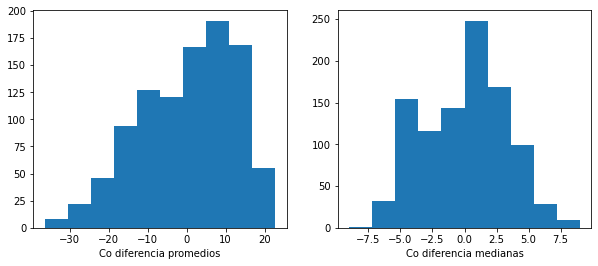

In [48]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(dif_permuations_vol_plu_mean,label='permutations')
plt.xlabel('Co diferencia promedios')

plt.subplot(1,2,2)
plt.hist(dif_permuations_vol_plu_median,label='permutations')
plt.xlabel('Co diferencia medianas')

plt.show()

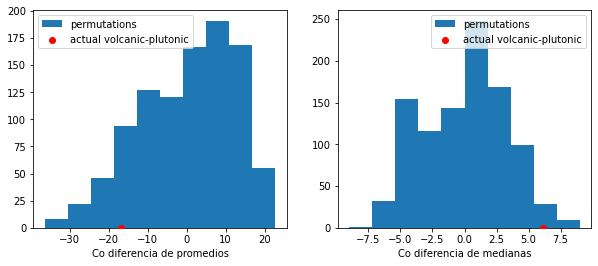

In [49]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(dif_permuations_vol_plu_mean,label='permutations')
plt.scatter(new_mean_diff,0,color='red',zorder=1000,label='actual volcanic-plutonic')
plt.xlabel('Co diferencia de promedios')
plt.legend()

plt.subplot(1,2,2)
plt.hist(dif_permuations_vol_plu_median,label='permutations')
plt.scatter(new_median_diff,0,color='red',zorder=1000,label='actual volcanic-plutonic')
plt.xlabel('Co diferencia de medianas')
plt.legend()
plt.show()

In [50]:
mean_empirical_p = np.count_nonzero(np.array(dif_permuations_vol_plu_mean)<=new_mean_diff) / repetitions
median_empirical_p = np.count_nonzero(np.array(dif_permuations_vol_plu_median)<=new_median_diff) / repetitions
print('La media empírica es', mean_empirical_p)
print('La mediana empírica es', median_empirical_p)

La media empírica es 0.099
La mediana empírica es 0.977


Podemos ver que:

$Media_v - Media_p = 30.94$

Por otra parte, se tiene que

$Mediana_v - Mediana_p = -9.45$ 

De manera que, reinterpretando, podemos decir que en promedio las volcánicas máficas tienen mayor cantidad de Co que las plutónicas máficas, pero que la mayoría de las rocas plutónicas tiene más cobalto que las volcánicas. Podemos ver que se cumple la hipótesis alternativa, puesto que en escala la diferencia de las medias es bastante grande.

Más información sobre el cobalto para los curiosos:
https://pubs.usgs.gov/of/2017/1155/ofr20171155.pdf